# Imports

In [62]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression  # 분류(classification)

# Python에서 이미지 다루기

In [2]:
china = datasets.load_sample_image('china.jpg')
#> 이미지 파일을 읽어서, 이미지를 numpy.ndarray로 변환

In [3]:
type(china)

numpy.ndarray

In [4]:
china.shape  #> (height, width, rgb/rgba)

(427, 640, 3)

* 흑백 이미지인 경우, 이미지 배열의 모양(shape): (height, width)
* 컬러 이미지인 경우,
        * 불투명 이미지(jpg)의 배열 모양: (height, width, 3)
        * 투명도가 있는 이미지(png)의 배열 모양: (height, width, 4)
* 이미지 배열의 숫자 스케일
        * 0 ~ 255 정수 스케일 - 정수 3d/2d-array
        * 0.0 ~ 1.0 실수 스케일 - 실수 3d/2d-array

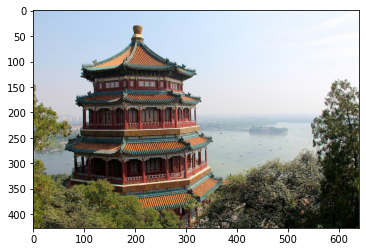

In [6]:
plt.imshow(china)
plt.show()

In [7]:
china[:, :, 0]   # RGB 중에서 R의 크기만 가지고 있는 배열

array([[174, 174, 174, ..., 250, 250, 250],
       [172, 173, 173, ..., 251, 251, 251],
       [174, 174, 174, ..., 252, 252, 252],
       ...,
       [ 88, 147, 122, ...,  39,   8,   6],
       [122, 129, 118, ...,   9,   9,  16],
       [116, 104, 108, ...,  43,  13,  15]], dtype=uint8)

In [8]:
china_scaled = china / 255
china_scaled[:,:,0]

array([[0.68235294, 0.68235294, 0.68235294, ..., 0.98039216, 0.98039216,
        0.98039216],
       [0.6745098 , 0.67843137, 0.67843137, ..., 0.98431373, 0.98431373,
        0.98431373],
       [0.68235294, 0.68235294, 0.68235294, ..., 0.98823529, 0.98823529,
        0.98823529],
       ...,
       [0.34509804, 0.57647059, 0.47843137, ..., 0.15294118, 0.03137255,
        0.02352941],
       [0.47843137, 0.50588235, 0.4627451 , ..., 0.03529412, 0.03529412,
        0.0627451 ],
       [0.45490196, 0.40784314, 0.42352941, ..., 0.16862745, 0.05098039,
        0.05882353]])

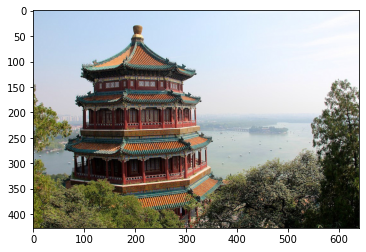

In [9]:
plt.imshow(china_scaled)
plt.show()

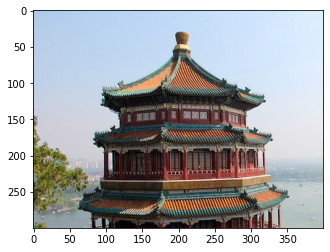

In [31]:
# 이미지 자르기 - ndarray slicing
china_cropped = china[:300, :400, :]
plt.imshow(china_cropped)
plt.show()

In [32]:
# pyplot.imsave(파일이름, 이미지배열): 이미지 (숫자) 배열을 이미지 파일(jpg)에 저장
plt.imsave('china_cropped.jpg', china_cropped)

In [33]:
# pyplot.imread(파일이름): 이미지 파일(jpg)을 읽어서 numpy.ndarray (숫자 배열)을 리턴
imgdata = plt.imread('china_cropped.jpg')

In [34]:
print(type(imgdata))
print(imgdata.shape)

<class 'numpy.ndarray'>
(300, 400, 3)


# MNIST 데이터 셋

70,000개의 숫자(0 ~ 9) 흑백 손글씨 이미지(28x28)가 numpy.ndarray (숫자 배열)로 저장된 데이터 셋

In [11]:
mnist = datasets.fetch_openml('mnist_784')

In [12]:
type(mnist)   #> Bunch: Python의 dict(key-value)와 비슷한 타입

sklearn.utils.Bunch

In [13]:
mnist.keys()   # dict의 key들만 리턴

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
X = mnist['data'].values.copy()   # 특성 배열 - DF의 값들로만 이루어진 ndarray를 복사

In [16]:
X.shape   #> (이미지 개수, 픽셀 수)

(70000, 784)

In [18]:
y = mnist['target'].values.copy()  # 타겟(레이블) 배열 - Series의 값들로만 이루어진 ndarray를 복사

In [19]:
y.shape   # 1차원 배열.   #> (이미지 개수)

(70000,)

In [20]:
y    #> 0 ~ 9 숫자들 70,000개가 랜덤하게 섞여 있음

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [22]:
counts = y.value_counts()
counts

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

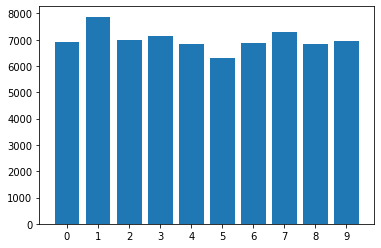

In [23]:
plt.bar(x=counts.index, height=counts.values)
plt.show()

배열 X에서 첫 번째 이미지를 선택해서 시각화

In [25]:
image_0 = X[0].reshape((28, 28))   # (784, ) 모양의 1d-array를 (28,28) 모양의 2d-array로 변환
image_0

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

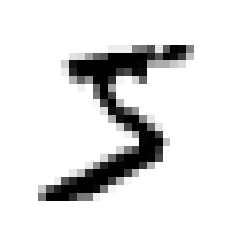

In [29]:
plt.imshow(image_0, cmap=plt.cm.binary)
plt.axis('off')
plt.show()

배열 X에 저장된 이미지 데이터 중에서 첫 100개의 이미지를 10x10 subplot에 시각화

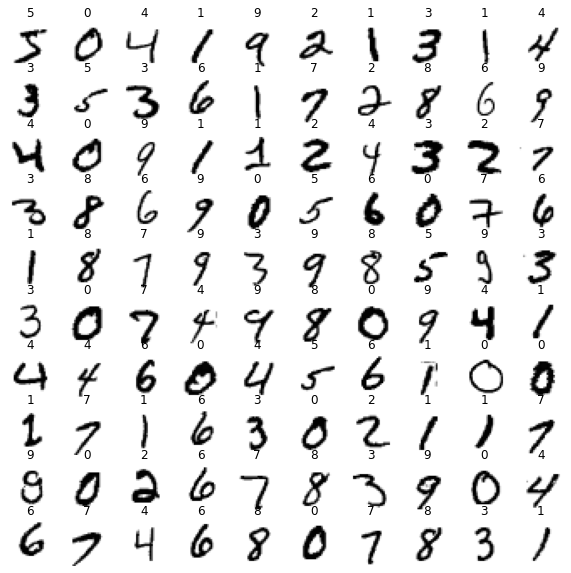

In [30]:
nrows = 10
ncols = 10
fig, ax = plt.subplots(nrows,ncols, figsize=(ncols,nrows))
for i in range(nrows):
    for j in range(ncols):
        imgdata = X[i * nrows + j].reshape((28,28))
        label = y[i * nrows + j]
        ax[i,j].imshow(imgdata,cmap=plt.cm.binary)
        ax[i,j].axis('off')
        ax[i,j].set_title(label)

plt.show()

# Train(훈련)/Validation(검증)/Test(테스트) 분리

* 훈련 셋(Train set): ML 모델 훈련(학습)
* 검증 셋(Validation set): 훈련된 ML 모델의 일반화 성능을 테스트하기 위한 셋. 하이퍼 파라미터들을 튜닝하기 위한 목적으로 사용
* 테스트 셋(Test set): 최종적으로 선택된 ML 모델의 일반화 성능을 예상하기 위해서 사용하는 셋. ML의 전 과정에서 오직 1번만 사용함

In [36]:
# 70,000개 전체 데이터를 훈련 셋 60,000개, 테스트 셋 10,000개로 나누기
X_tr_big, X_te = X[:60_000], X[60_000:]
y_tr_big, y_te = y[:60_000], y[60_000:]

In [37]:
X_tr_big.shape, y_tr_big.shape

((60000, 784), (60000,))

In [38]:
# 60,000개 훈련 셋을 다시 훈련 셋 54,000개, 검증 셋 6,000개로 나누기
X_tr, X_val = X_tr_big[:54_000], X_tr_big[54_000:]
y_tr, y_val = y_tr_big[:54_000], y_tr_big[54_000:]

In [39]:
X_tr.shape, y_tr.shape

((54000, 784), (54000,))

* `train_test_split()` 함수를 사용해서 훈련/검증/테스트 셋 분리
* MNIST 데이터 셋은 랜덤하게 섞여 있기 때문에 순차 추출을 이용할 수도 있음

# KNN 모델 선택, 훈련, 평가

In [42]:
knn = KNeighborsClassifier(n_jobs=-1)   # ML 모델 생성
# n_jobs: 동시 병렬 작업의 수. 기본값은 1개. -1은 CPU의 최대 성능을 모두 사용한다는 의미

In [43]:
knn.fit(X_tr, y_tr)   # ML 모델 훈련

KNeighborsClassifier(n_jobs=-1)

In [45]:
knn.score(X_tr, y_tr)
# (1) predict(X_tr), (2) 예측값 == y_tr, (3) 정확도(accuracy)를 리턴

0.9811481481481481

In [46]:
y_tr_pred = knn.predict(X_tr)

In [55]:
conf_mat = confusion_matrix(y_tr, y_tr_pred)

## 틀린 예측 분석

In [48]:
# 예측값과 실제값이 다른 샘플들
X_wrong = X_tr[y_tr != y_tr_pred]
X_wrong.shape

(1018, 784)

In [49]:
# 실제값과 예측값이 다른 레이블(실제값)들
y_wrong = y_tr[y_tr != y_tr_pred]
y_wrong

['9', '2', '5', '2', '2', ..., '3', '5', '8', '8', '8']
Length: 1018
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [50]:
# 실제값과 예측값이 다른 예측값들
wrong_pred = y_tr_pred[y_tr != y_tr_pred]
wrong_pred

array(['0', '7', '1', ..., '3', '3', '0'], dtype=object)

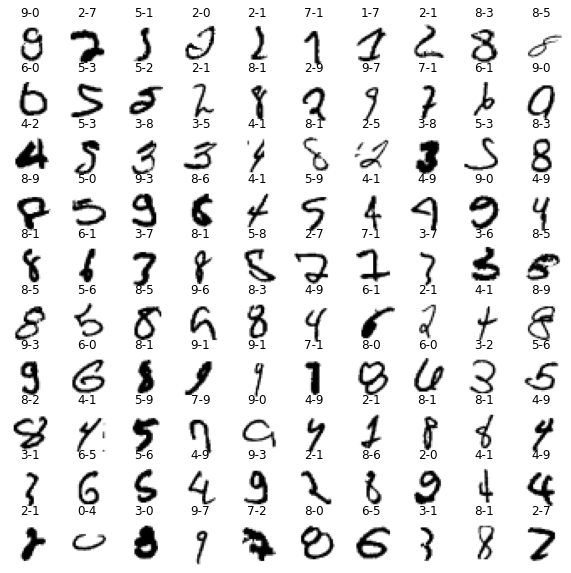

In [53]:
# 예측값이 틀린 샘플들 중 첫 100개를 시각화
nrows = 10
ncols = 10
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
for i in range(nrows):
    for j in range(ncols):
        idx = i * nrows + j
        imgdata = X_wrong[idx].reshape((28,28))
        ax[i,j].imshow(imgdata, cmap=plt.cm.binary)
        ax[i,j].axis('off')
        ax[i,j].set_title(f'{y_wrong[idx]}-{wrong_pred[idx]}')

plt.show()

### confusion matrix 시각화

틀린 개수가 큰 부분은 밝게, 틀린 개수가 적은 부분은 어둡게 표현

In [56]:
conf_mat

array([[5310,    3,    2,    0,    1,    4,   13,    1,    1,    1],
       [   1, 6092,    6,    0,    0,    0,    1,   10,    1,    1],
       [  24,   34, 5231,    6,    5,    3,    6,   42,    4,    3],
       [   4,   12,   24, 5379,    0,   31,    2,   20,   16,   16],
       [   3,   34,    1,    1, 5132,    0,    7,    4,    1,   64],
       [  12,    5,    3,   33,    6, 4758,   38,    2,    3,   12],
       [  14,    9,    0,    0,    4,   12, 5307,    0,    1,    0],
       [   1,   43,    7,    2,    8,    0,    0, 5506,    0,   30],
       [  14,   55,    9,   38,   18,   46,   13,   10, 5013,   38],
       [  12,    7,    5,   20,   29,    6,    1,   33,    6, 5254]])

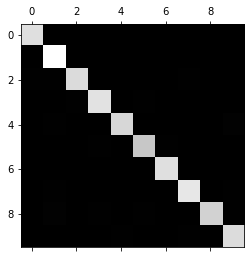

In [58]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
#> cmap: 
#  (1) binary: 0(white), 숫자가 커질 수록 black에 가까워짐
#  (2) gray: 0(black), 숫자가 커질 수록 white에 가까워짐
plt.show()

대각선(정답을 맞춘 부분)은 분석 대상이 아니므로, 0으로 대체 --> 어둡게(검은색) 표현

In [59]:
np.fill_diagonal(conf_mat, 0)
conf_mat

array([[ 0,  3,  2,  0,  1,  4, 13,  1,  1,  1],
       [ 1,  0,  6,  0,  0,  0,  1, 10,  1,  1],
       [24, 34,  0,  6,  5,  3,  6, 42,  4,  3],
       [ 4, 12, 24,  0,  0, 31,  2, 20, 16, 16],
       [ 3, 34,  1,  1,  0,  0,  7,  4,  1, 64],
       [12,  5,  3, 33,  6,  0, 38,  2,  3, 12],
       [14,  9,  0,  0,  4, 12,  0,  0,  1,  0],
       [ 1, 43,  7,  2,  8,  0,  0,  0,  0, 30],
       [14, 55,  9, 38, 18, 46, 13, 10,  0, 38],
       [12,  7,  5, 20, 29,  6,  1, 33,  6,  0]])

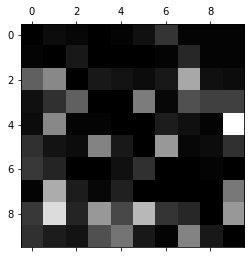

In [60]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

## 과대 적합(overfitting)

In [61]:
y_val_pred = knn.predict(X_val)  # 검증 셋의 예측값
y_val_pred

array(['5', '3', '5', ..., '5', '6', '8'], dtype=object)

In [63]:
y_val   # 검증 셋 실제값

['5', '3', '5', '0', '0', ..., '8', '3', '5', '6', '8']
Length: 6000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [64]:
# np.mean(y_val == y_val_pred)   # 정확도
accuracy_score(y_val, y_val_pred)

0.9758333333333333

과대 적합의 크기가 작다 -> 일반화 성능이 나쁘지 않을 것이라고 예상됨

# LogisticRegression

In [66]:
logistic = LogisticRegression(random_state=42, n_jobs=-1)   # ML 모델 생성

In [67]:
logistic.fit(X_tr, y_tr)  # 학습(훈련)

LogisticRegression(n_jobs=-1, random_state=42)

In [68]:
y_tr_pred = logistic.predict(X_tr)   # 훈련 셋 예측값

In [69]:
accuracy_score(y_tr, y_tr_pred)   # 훈련 셋 정확도

0.9327592592592593

In [70]:
conf_mat = confusion_matrix(y_tr, y_tr_pred)
conf_mat

array([[5194,    0,   17,    8,   11,   30,   30,    6,   35,    5],
       [   1, 5966,   27,   19,    6,   14,    3,    9,   54,   13],
       [  26,   48, 4883,   83,   54,   17,   56,   48,  121,   22],
       [  17,   20,  112, 4993,    5,  146,   12,   48,  115,   36],
       [  12,   15,   25,    9, 4919,    8,   44,   14,   34,  167],
       [  48,   18,   37,  146,   45, 4306,   75,   14,  144,   39],
       [  30,    9,   37,    0,   33,   53, 5156,    5,   20,    4],
       [  11,   17,   48,   27,   33,    8,    4, 5260,   13,  176],
       [  24,   80,   52,  112,   18,  126,   40,   13, 4742,   47],
       [  20,   23,   11,   64,  102,   30,    3,  130,   40, 4950]])

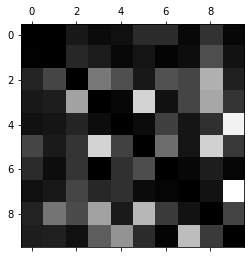

In [73]:
np.fill_diagonal(conf_mat, 0)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

In [74]:
y_val_pred = logistic.predict(X_val)   # 검증 셋의 예측값

In [75]:
accuracy_score(y_val, y_val_pred)   # 검증 셋의 정확도

0.9368333333333333

훈련 셋과 검증 셋 사이에서 과대적합(overfitting)이 없다.

## LogisticRegression 원리

logistic 함수

$$
\phi(z) = \dfrac{e^z}{e^z + 1} = \dfrac{1}{1 + e^{-z}}
$$


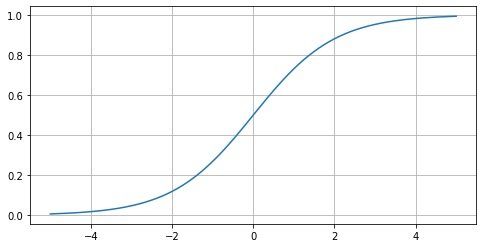

In [ ]:
z = np.arange(-5, 5, 0.0001)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8, 4))
plt.plot(z, sigmoid)
plt.grid()
plt.show()

선형 회귀

$$
z = w_0 + \sum_{i=1}^{n}{w_i \times x_i}
$$

훈련 셋의 특성들로 선형회귀식을 찾아서, logistic 함수에 전달해서 계산된 리턴 값은 클래스에 속할 확률로 해석할 수 있다.

Logistic Regression은 선형 회귀를 이용해서 클래스에 속할 확률을 계산하고 분류를 하는 분류 알고리즘.

In [ ]:
logistic.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
logistic.coef_.shape

(10, 784)

In [ ]:
logistic.intercept_

array([-6.84955436e-05,  5.41502399e-05,  5.16628262e-05, -7.03985398e-05,
        8.20520981e-06,  3.70634742e-04, -2.49898964e-05,  1.27079776e-04,
       -3.66674197e-04, -8.11746174e-05])

In [ ]:
probs = logistic.predict_proba(X[:5])
probs  # (5, 10) shape의 2d-array

array([[3.77050421e-05, 9.88513788e-09, 2.26469974e-04, 2.56443017e-01,
        3.05325070e-08, 7.43198417e-01, 1.99796753e-07, 5.61172539e-06,
        5.86530790e-05, 2.98857238e-05],
       [9.99993465e-01, 1.58569816e-13, 5.06406613e-07, 2.68173635e-07,
        1.66967374e-09, 3.97873430e-06, 3.30559756e-08, 2.10897613e-08,
        1.01717357e-06, 7.08860500e-07],
       [3.90222222e-05, 1.14058942e-06, 8.82430714e-02, 2.30426898e-01,
        6.71168759e-01, 3.80167752e-06, 8.71157327e-04, 2.76567469e-03,
        2.45886206e-03, 4.02161311e-03],
       [1.26626485e-06, 9.80542829e-01, 1.16816835e-02, 8.00562747e-04,
        1.33448311e-05, 6.50488804e-06, 3.14560919e-06, 2.60679612e-06,
        6.92167618e-03, 2.63799996e-05],
       [7.57363707e-08, 8.83254344e-06, 1.19311933e-07, 3.54724834e-06,
        3.00765449e-02, 4.47896183e-05, 5.72230768e-07, 6.30270102e-03,
        1.13999310e-03, 9.62422824e-01]])

In [ ]:
y_tr_pred[:5]

array(['5', '0', '4', '1', '9'], dtype=object)